# Electricity Demand Forecasting using Time-Series Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [6]:
data = pd.read_csv(
    r"C:\Users\BVAYA\Desktop\energy-theft-prediction\data\processed\energy_cleaned.csv",
    parse_dates=['DateTime'],
    index_col='DateTime'
)

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
daily_demand = data['Global_active_power'].resample('D').mean()
daily_demand.head()

DateTime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Freq: D, Name: Global_active_power, dtype: float64

Daily aggregation reduces noise and captures long-term consumption trends.


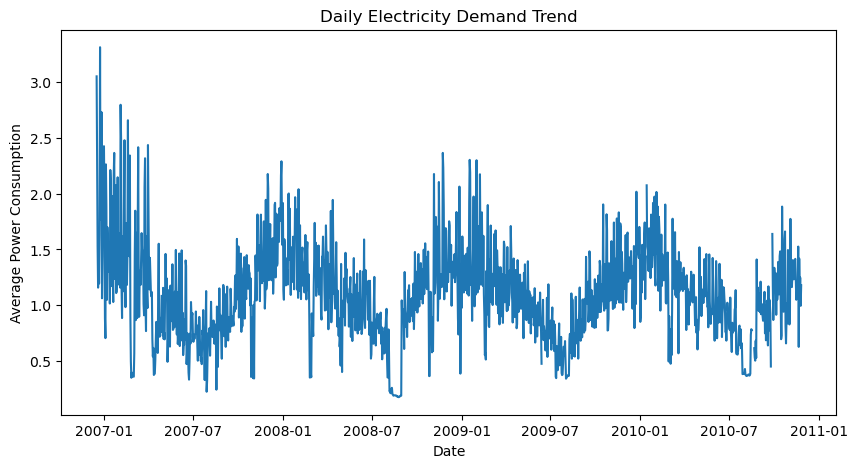

In [7]:
plt.figure(figsize=(10,5))
plt.plot(daily_demand)
plt.title('Daily Electricity Demand Trend')
plt.xlabel('Date')
plt.ylabel('Average Power Consumption')
plt.show()

# Train Forecasting Model (ARIMA)

In [8]:
train = daily_demand[:-30]
test = daily_demand[-30:]

In [14]:
model = ARIMA(train, order=(1,1,1))  # ARIMA - used past time-series value to predict future values
model_fit = model.fit()

In [11]:
forecast = model_fit.forecast(steps=30)   #Forecast Future Demand
forecast.index = test.index

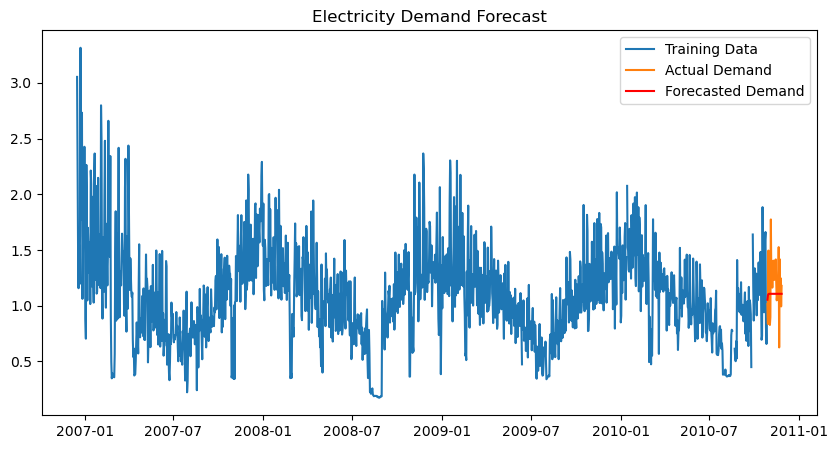

In [12]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Demand')
plt.plot(forecast.index, forecast, label='Forecasted Demand', color='red')
plt.legend()
plt.title('Electricity Demand Forecast')
plt.show()

### Demand Forecast Interpretation

The ARIMA model captures historical consumption trends
and forecasts short-term electricity demand. Such forecasts
can help power utilities plan load distribution and prevent
overloading during peak periods.


In [13]:
forecast.to_csv(r'C:\Users\BVAYA\Desktop\energy-theft-prediction\data\processed\demand_forecast.csv')